# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

df = pd.read_csv('/users/hp/desktop/Ds-springboard/mini_project/human_body/EDA_human_temperature/data/human_body_temperature.csv')

In [180]:
# dataframe details.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [181]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [182]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [183]:
df.isnull().sum()

temperature    0
gender         0
heart_rate     0
dtype: int64

In [184]:
df[df.duplicated(keep=False)]

,temperature,gender,heart_rate
7,98.8,M,78.0
54,98.2,F,73.0
72,98.0,M,78.0
75,98.8,M,78.0
87,98.0,M,78.0
127,98.2,F,73.0


# Is the distribution of body temperatures normal?

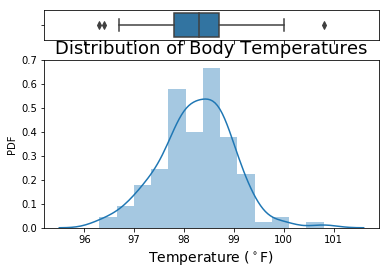

In [185]:
#checking normality using graphical method
# create figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# boxplot for temperature:
sns.boxplot(df.temperature, ax=boxplot)

# histogram for temperature:
sns.distplot(df.temperature, ax=histogram)

# Label axes and add title:
plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
plt.ylabel('PDF')
plt.title('Distribution of Body Temperatures', fontsize=18)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Display the plots:
plt.show()

In [186]:
# Define a function to compute the CDF:

def ecdf(temp):
 
    # Number of data points:
    n = len(temp)

    # x-data for the CDF:
    x = np.sort(temp)

    # y-data for the CDF:
    y = np.arange(1, n+1) / n

    return x, y

In [187]:
# Compute and save variables for summarizing the empirical distribution -

# Sample Size:
n = len(df.temperature)

# Sample Mean:
M = np.mean(df.temperature)

# Sample Standard Deviation:
s = np.std(df.temperature)

print('sample size =', n, '\nsample mean =', M, '\nsample standard deviation =', s)

sample size = 130 
sample mean = 98.24923076923078 
sample standard deviation = 0.7303577789050377


In [188]:
# Seed the random number generator:
np.random.seed(15)

# Simulate a random sample with the same statistics and size of 10,000:
normal = np.random.normal(M, s, 10000)
normal


array([98.02111923, 98.49702999, 98.13536176, ..., 98.79844721,
       97.6501198 , 98.22401087])

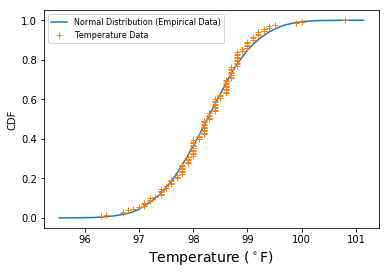

In [189]:
# graphical way of checking normality
# Compute CDFs:
x_temp, y_temp = ecdf(df.temperature)
x_norm, y_norm = ecdf(normal)

# Plot both CDFs on the same plot:
fig = plt.plot(x_norm, y_norm)
fig = plt.plot(x_temp, y_temp,marker='+', linestyle='none')

# Label axes and add legend and a title:
fig = plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
fig = plt.ylabel('CDF')
fig = plt.legend(('Normal Distribution (Empirical Data)', 'Temperature Data'), loc='upper left',fontsize=8)

# display the plots:

plt.show()

Sample CDF distribution closely follows theoretical CDF distribution. This indicates that human body temperature sample data is normally distributed.

In [190]:
#checking normality using mnormality test
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

The p-value is about 0.26, which means this test fail to reject the null hypothesis. This sample data is normally distributed. Based on comparison with theoretical CDF, normality test, we can say that the body temperature is normally distributed.


# Is the Sample Size Large? Are the Observations Independent?

In [191]:
# Print the body temperature sample size:
print('Sample size:', n)


Sample size: 130


Sample size 130. To satisfy Central Limit Theorem the sample must satisfy the sample size should be >= 30. Here the sample size more than required. Hence sample size is large enough. Observations are independent because they are from different people.

# Is the true population mean really 98.6 degrees F?

Is it best to use a one-sample or two-sample test? Why?

In this situation, is it appropriate to use the t or z statistic?

Try using the other test. How is the result different? Why?

Another test method is to generate many sets of simulated data assuming the null hypothesis is true, then compute the test statistic for each simulated dataset:

In [192]:
# Define bootstrap functions:

def replicate(data, function):
    """Return replicate of a resampled data array."""
    
    # Create the resampled array and return the statistic of interest:
    return function(np.random.choice(data, size=len(data)))


def draw_replicates(data, function, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates:
    replicates = np.empty(size)

    # Generate replicates:
    for i in range(size):
        replicates[i] = replicate(data, function)

    return replicates

In [193]:
# Seed the random number generator:
np.random.seed(15)


# Make an array of translated temperatures:
translated_temps = df.temperature - M + 98.6

# Draw bootstrap replicates of translated temperatures:
translated_replicates = draw_replicates(translated_temps, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temperature mean:
p = np.sum(translated_replicates <= M) / len(translated_replicates)

# Print the p-value:
print('p-value =', p)

p-value = 0.0


In every test the p-value is significantly less than 0.01, so the null hypothesis is rejected. There is sufficient evidence to warrant rejection of the claim that the true population mean is the conventional normal human body temperature of 98.6°F.

We are testing a sample set of data against the population mean (a single value), we should use a one-sample test. For this situation, it is best to use a t-statistic since the population standard deviation is unknown. Though a t-test is best for small samples, it becomes similar to the z-test with large samples, so the results shouldn't differ much. Both t and z statistics can work in this case since there is enough data and it is normally distributed. However, since the population variance is not known or given, it is better to use a t-test over a z-test.

Null Hypothesis: The true population mean is equal to the conventional mean (98.6∘F).
H0:μ−98.6=0
Significance Level: 99.9% Confidence

α=0.01

In [194]:
# Save results of a one sample t-test:
t = stats.ttest_1samp(df.temperature, 98.6)[0]
p = stats.ttest_1samp(df.temperature, 98.6)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -5.4548232923645195
p-value: 2.4106320415561276e-07


In [195]:
# Print the quantiles of the t-distribution corresponding to
# confidence level and degrees of freedom:
print((stats.t.ppf(q=0.0005, df=n-1)), (stats.t.ppf(q=0.9995, df=n-1)))

-3.3675464541818454 3.367546454181878


The t-statistic falls outside the t-distribution corresponding to a 99.9% confidence level and the p-value is certainly below the significance level of 0.01, so the null hypothesis can be rejected.

The z-test is not the most appropriate since the population standard deviation is not known; however, it can be approximated using the standard error of the mean:

In [196]:
# Calculate standard error of the mean:
sem = s/np.sqrt(n)

In [197]:
# Calculate z-statistic:
z = (M - 98.6) / sem

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -5.475925202078116
p-value: 4.3523151658821886e-08


In all tests the p-value is significantly less than 0.01, so the null hypothesis can be rejected which means there is a significant difference between the sample and population mean. 

# Draw a Sample of Size 10 from the Data and Repeat Both Tests

Which one is the correct one to use?

What is noticeable? 

What does this say about the difference in application of the t and z statistic?

A small sample is generally regarded as one of size n<30.This test meets the criteria for a t-test: the population standard deviation is unknown and the sample size is small (n=10).

If the sample is large (n>=30) then statistical theory says that the sample mean is normally distributed and a z test for a single mean can be used. Here z test can not be used.


In [198]:
# Seed the random number generator:
np.random.seed(15)

# Draw a random sample of 10 from the temperature data:
sample = np.random.choice(df.temperature, size=10)
sample


array([98.4, 97.9, 97.1, 98.7, 98.2, 98.4, 98.2, 98.8, 96.7, 96.4])

In [199]:
# Save results of a one sample t-test:
t = stats.ttest_1samp(sample, 98.6)[0]
p = stats.ttest_1samp(sample, 98.6)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -2.6882644585784705
p-value: 0.024867110651187487


In [200]:
# Calculate and save z-statistic:
z = (np.mean(sample) - 98.6) / (np.std(sample)/np.sqrt(len(sample)))

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -2.833679547329114
p-value: 0.004601545004804199


In [201]:
# Print the quantiles of the t-distribution corresponding to
# confidence level (95%) and degrees of freedom:
print((stats.t.ppf(q=0.025, df=10-1)), (stats.t.ppf(q=0.975, df=10-1)))


-2.262157162740992 2.2621571627409915


In [202]:
# Print the quantiles of the t-distribution corresponding to
# confidence level (99.9%) and degrees of freedom:
print((stats.t.ppf(q=0.0005, df=10-1)), (stats.t.ppf(q=0.9995, df=10-1)))

-4.780912585933472 4.7809125859335495


The test statistic falls outside the t-distribution corresponding to a 95% confidence level, but not 99.9%. The p-value for the z-test is below both significance levels, but the p-value for the t-test indicates significance only at the 95% level. Both tests provide evidence to reject the null hypothesis. The difference in results reflects the nature of the two distributions. The t-distribution is wider so there is more variability. This makes the t-test less sensitive.


# At what value is one's temperature considered 'abnormal'?¶



In [203]:
mean = np.mean(df.temperature)
std  = np.std(df.temperature)
error = std * stats.norm.ppf(1 - (1-0.95)/2.)
print('Sample mean is %f +/- %f.' % (mean, error))

Sample mean is 98.249231 +/- 1.431475.


In [204]:
# Save the critical value at 95% confidence:
z_critical = norm.ppf(0.975)
z_critical

1.959963984540054

In [205]:
# Calculate and save the margin of error:
moe = z_critical * s
print('Margin of Error:', moe)

# Calculate and save the 95% prediction interval:
PI = np.array([M - moe, M + moe])
print('95% Prediction Interval:', PI)

Margin of Error: 1.4314749424825415
95% Prediction Interval: [96.81775583 99.68070571]


This calculation says that we 95% of the population lies between 96.82 and 99.68. Temperatures outside this range would be considered "abnormal".

# Is There a Significant Difference Between Males and Females in Normal Temperature?¶

What test is used and why?

Write a story with your conclusion in the context of the original problem.


 A two-sample t-test is appropriate since the means of two independent samples are compared. First, some graphical data analysis:

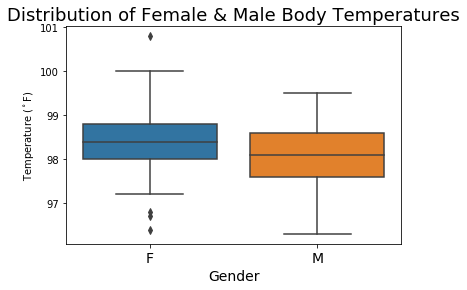

In [206]:
# Create boxplots for temperature by gender:
fig = sns.boxplot(x='gender', y='temperature', data=df)

# Increase tick mark font size, label axes and add title:
plt.tick_params(axis='x', which='major', labelsize=14)
fig = plt.xlabel('Gender', fontsize=14)
fig = plt.ylabel('Temperature ($^\circ$F)')
plt.title('Distribution of Female & Male Body Temperatures', fontsize=18)

# Display the plots:
plt.show()

In [207]:
# temperatures filtered by gender:
female_temp = df.temperature[df.gender == 'F']
male_temp = df.temperature[df.gender == 'M']

# Sample Sizes:
n_female = len(female_temp)
n_male = len(male_temp)

# Sample Means:
M_female = np.mean(female_temp)
s_female = np.std(female_temp)
M_male = np.mean(male_temp)
s_male = np.std(male_temp)

print('Female Sample Size:', n_female, '\nFemale Temperature Mean:', M_female)
print('\nMale Sample Size:', n_male, '\nMale Temperature Mean:', M_male)

Female Sample Size: 65 
Female Temperature Mean: 98.39384615384613

Male Sample Size: 65 
Male Temperature Mean: 98.1046153846154


There is a difference between the mean temperatures of females and males in the sample data, but a statistical analysis will help determine if the difference is significant.We can calculate a 2-sample t-test since we have two sample means we want to compare.

Null Hypothesis: There is no significant difference between female and male normal human body temperature.

H0:μfemales−μmales=0
Significance Level: 95% Confidence

α=0.05

In [208]:
stats.ttest_ind(male_temp, female_temp)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

A two-sample t-test returned a t-statistic of 2.29 and p-value of 0.024, so here too, the null hypothesis is rejected. The difference in human body temperatures between females and males, though significant, is not extreme. 

# Summary and Conclusions

Is the distribution of body temperatures normal?

The p-value is about 0.26, which means this test fail to reject the null hypothesis. This sample data is normally distributed. Based on comparison with theoretical CDF, normality test, we can say that the body temperature is normally distributed.


Is the sample size large? Are the observations independent?

Sample size 130. To satisfy Central Limit Theorem the sample must satisfy the sample size should be >= 30. Here the sample size more than required. Hence sample size is large enough. Observations are independent because they are from different people.

Is the true population mean really 98.6°F?

We are testing a sample set of data against the population mean (a single value), we should use a one-sample test. For this situation, it is best to use a t-statistic since the population standard deviation is unknown. Though a t-test is best for small samples, it becomes similar to the z-test with large samples, so the results shouldn't differ much. Both t and z statistics can work in this case since there is enough data and it is normally distributed. However, since the population variance is not known or given, it is better to use a t-test over a z-test.
In all tests the p-value is significantly less than 0.01, so the null hypothesis can be rejected which means there is a significant difference between the sample and population mean temperature. 

Draw a sample of size 10 from the data and repeat both tests.

Since the population standard deviation is unkown and the sample size is small, the t-test was chosen again as the most appropriate. However, the z-test returned the most significant results, as it is the most sensitive of the two.

At what value is one's temperature considered 'abnormal'?

Calculation says that we 95% of the population lies between 96.82 and 99.68. Temperatures outside this range would be considered "abnormal".

Is there a significant difference between males and females in normal temperature?


A two-sample t-test returned a t-statistic of 2.29 and p-value of 0.024, so here too, the null hypothesis is rejected. The difference in human body temperatures between females and males, though significant, is not extreme.